<a href="https://colab.research.google.com/github/nvisagan/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

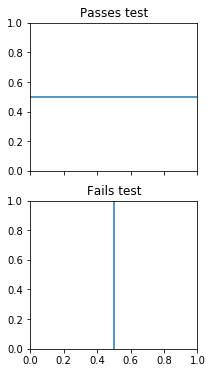

In [0]:
import matplotlib.pyplot as plt
import numpy as np

a = np.array([0,2])
b = np.array([1,0])

vectors = [a,b]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3,6),
                        sharex=True)

axes[0].axhline(y=0.5)
axes[0].set_title('Passes test')

axes[1].axvline(x=0.5)
axes[1].set_title('Fails test')

plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A single input (x) will match to more than one output (y)

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only function.It's the only one in which every x gets related to a single y. The other relations all have a same value x to a different Y

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

M: Input 3 to 3
N: Input 4 to 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
T_p = \begin{bmatrix} 1&3\\-1&2  \end{bmatrix}
\\
\\
T_q = \begin{bmatrix} 4&1&2\\-1&2&3\\5&1&-2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
#For T_p

def p(x1, x2):
    return np.array([[x1 + 3*x2],[2*x2 - x1]])

T_p = np.array([[1,3],[-1,2]])

print('Input array:')
print(np.array([[1],[2]]))
          
print('\nResult from traditional functions:')
print(p(1,2))

print('\nResult from matrix multiplication:')
print(np.matmul(T_p, np.array([[1],[2]])))

Input array:
[[1]
 [2]]

Result from traditional functions:
[[7]
 [3]]

Result from matrix multiplication:
[[7]
 [3]]


In [0]:
#For T_q
def q(x1, x2, x3):
    return np.array([[4*x1 + x2 + 2*x3],[2*x2 - x1 + 3*x3],[5*x1 - 2*x3 + x2]])

T_q = np.array([[4,1,2],[-1,2,3],[5,1,-2]])

print('Input array:')
print(np.array([[1],[2],[3]]))
          
print('\nResult from traditional functions:')
print(q(1,2,3))

print('\nResult from matrix multiplication:')
print(np.matmul(T_q, np.array([[1],[2],[3]])))


Input array:
[[1]
 [2]
 [3]]

Result from traditional functions:
[[12]
 [12]
 [ 1]]

Result from matrix multiplication:
[[12]
 [12]
 [ 1]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

An intuition for eigen values and eigen vectors 

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Its hard for humans to visualize the simulation of operations that happen in more than 3 dimensions.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

Have at least 10-20 observations per parameter

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import pandas as pd
from sklearn.decomposition import PCA
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
iris_x = iris.drop(columns='species').values # X values only.

In [0]:
# Retain only 2 components
pca = PCA(2)

# Fit to our X values
pca.fit(iris_x)

# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

# transform data
iris_transformed = pca.transform(iris_x)


 Eigenvectors: 
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]

 Eigenvalues: 
 [4.22484077 0.24224357]


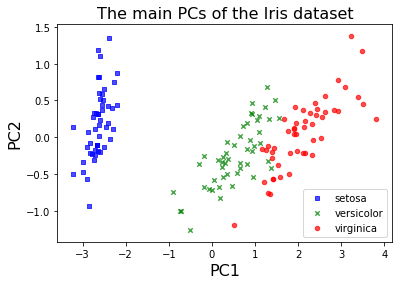

In [0]:
from mlxtend.plotting import category_scatter

iris_final = pd.DataFrame(iris_transformed, columns=['PC1', 'PC2'])

# Add back the plant Iris species
iris_final['Species'] = iris['species']

fig = category_scatter(data=iris_final,
                       x = 'PC1', 
                       y = 'PC2', 
                       label_col = 'Species')

plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('The main PCs of the Iris dataset', fontsize=16)

plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)